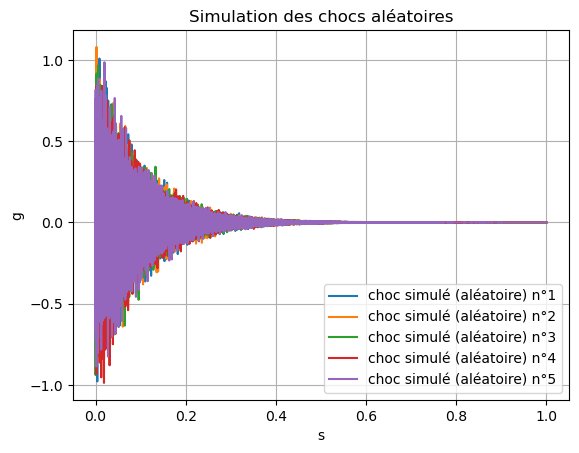

In [101]:
import numpy as np
import scipy
import pandas as pd
import endaq
import matplotlib.pyplot as plt

#Paramètres
duree=1
fe=400000
fc=20000
nbr_chocs=5
nbr_decim=10
lambdaa=10
fesurfmax=[]
freqs = np.logspace(start=np.log10(1),stop=np.log10(20000), num=1000, endpoint=True, base=10)

for i in range(nbr_decim):
    fesurfmax.append((fe/(i+1))/fc)


#Création des chocs
t=np.linspace(0,duree,duree*fe)
expo=1*np.exp(-lambdaa*t)
b, a = scipy.signal.butter(12, fc/(fe/2))
chocs=[]
for i in range(nbr_chocs):
    random=np.random.normal(loc=0, scale=1, size=duree*fe)
    y=random*expo
    y = scipy.signal.filtfilt(b, a, y, padlen=150)
    y[0]=0
    chocs.append(y)
    plt.plot(t,chocs[i], label="choc simulé (aléatoire) n°"+str(i+1))
plt.title("Simulation des chocs aléatoires")
plt.legend(loc="lower right")
plt.xlabel("s")
plt.ylabel("g")
plt.grid(which='major', axis='both')
plt.show()

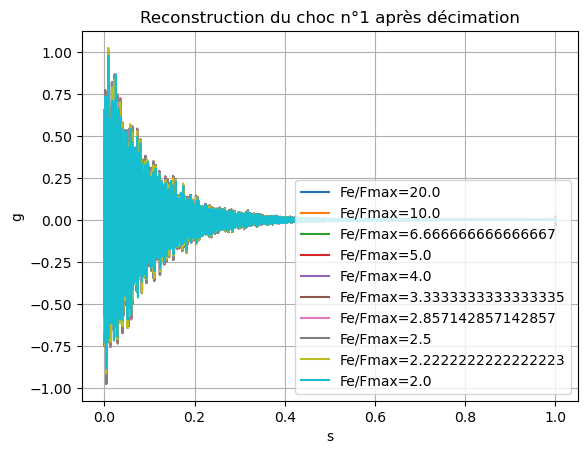

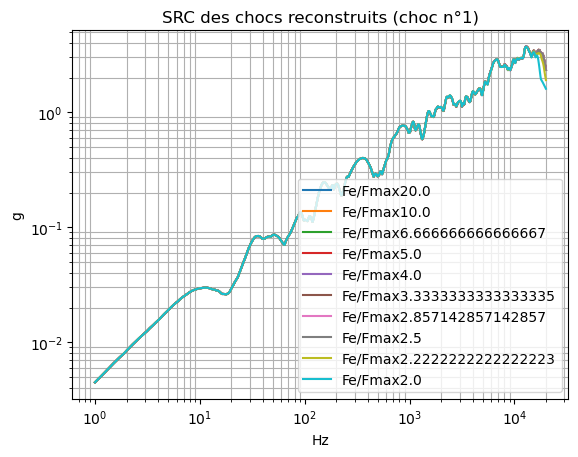

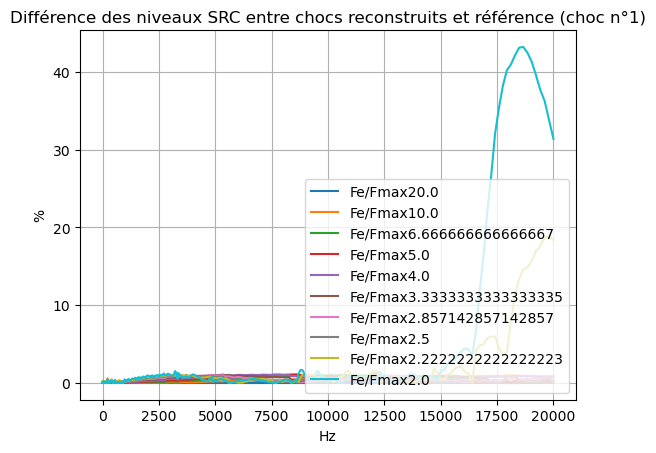

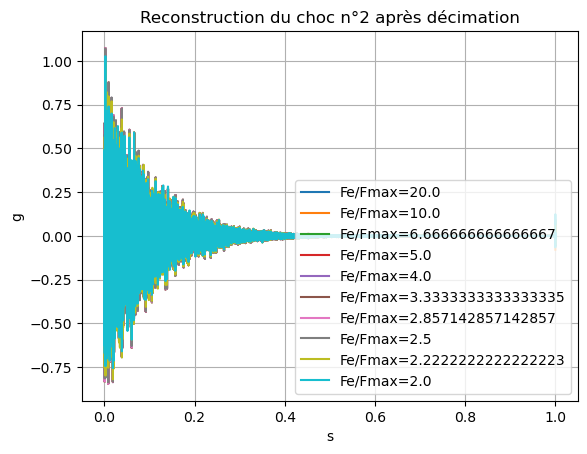

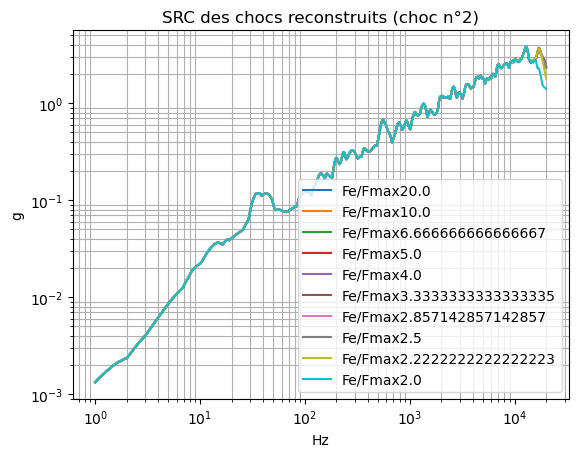

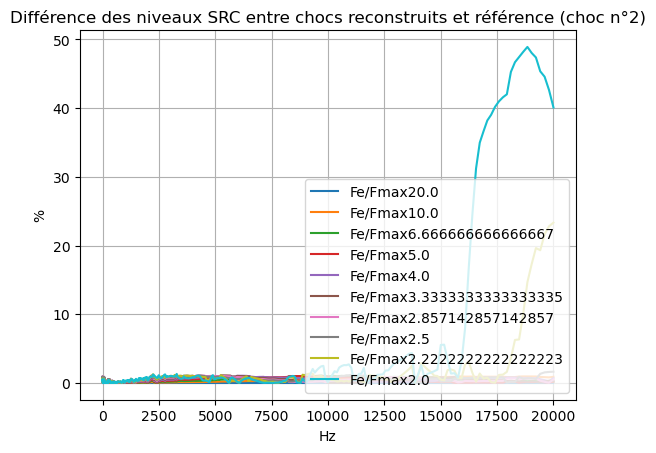

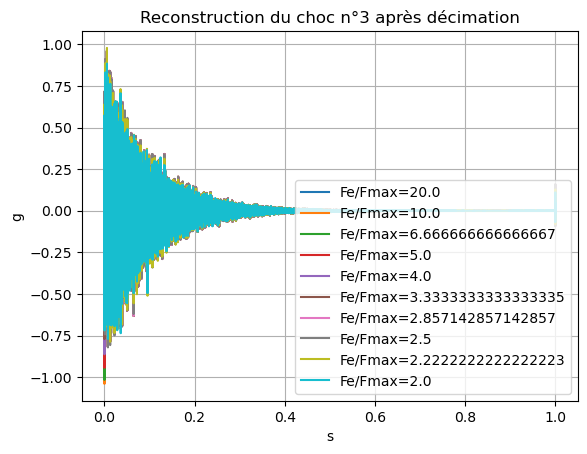

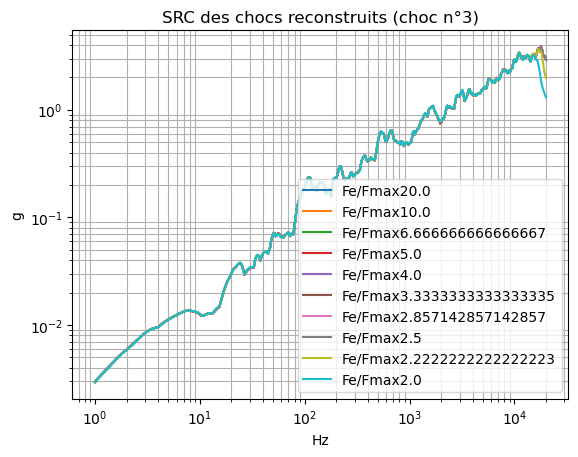

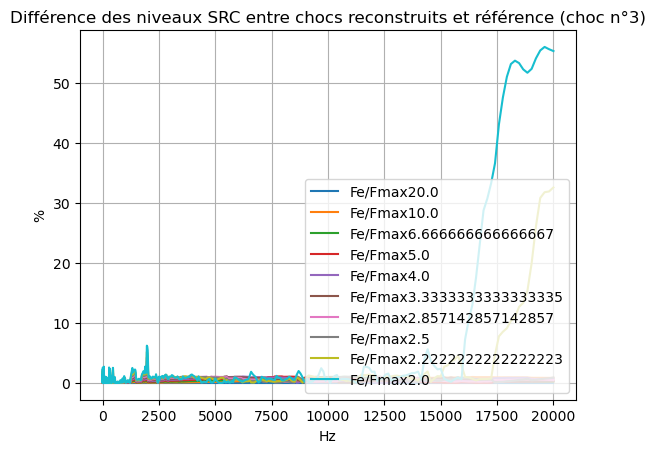

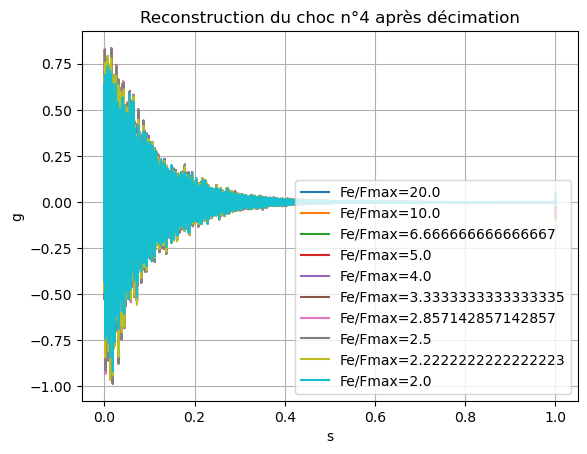

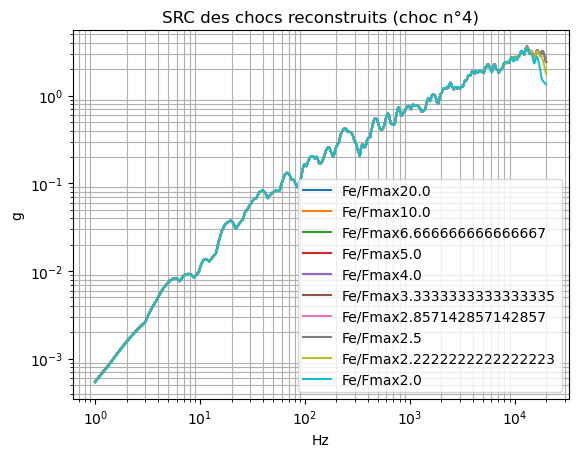

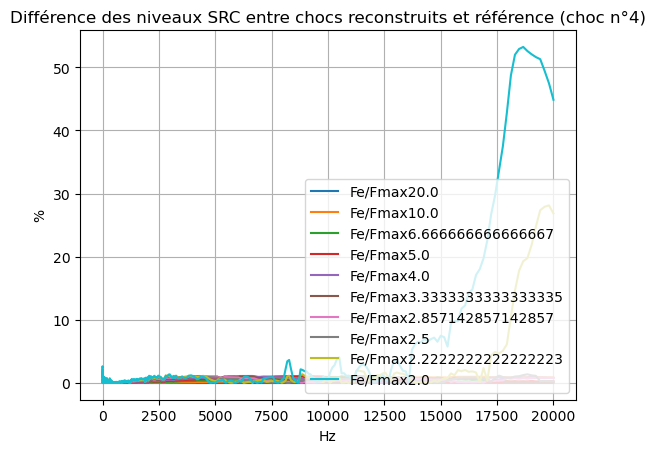

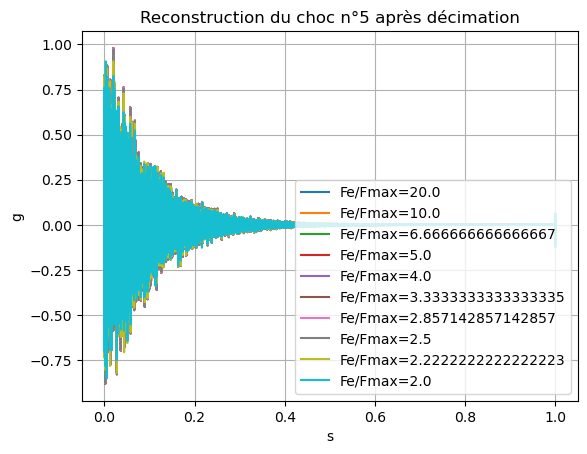

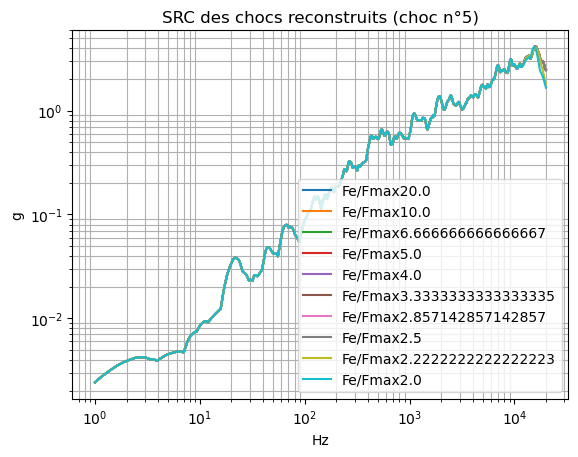

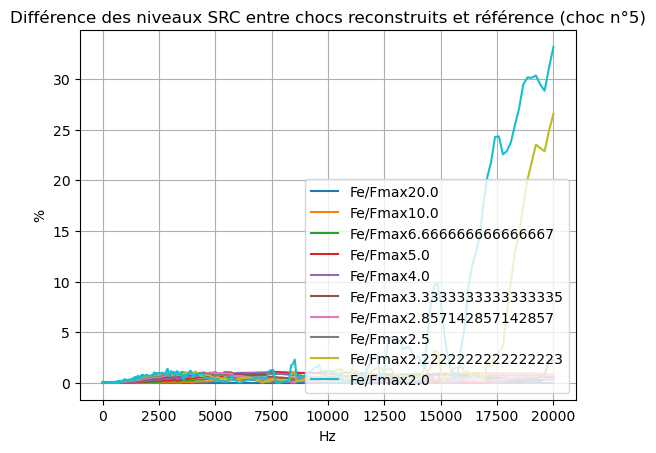

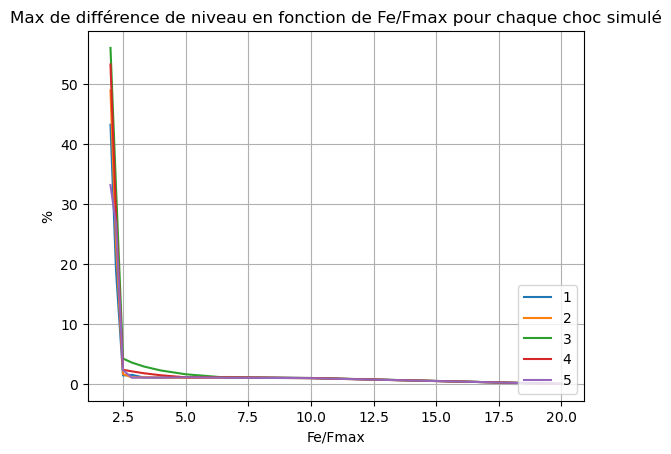

In [102]:
#Decimation
all_max_diff=[]
for j in range(nbr_chocs):
    
    choc_decim=[]
    t_decim = []
    choc_resample=[]
    for i in range(nbr_decim):
        choc_decim.append(scipy.signal.decimate(chocs[j], (i+1)))
        t_decim.append(np.linspace(0, duree, len(choc_decim[i]), endpoint=False))
        choc_resample.append(scipy.signal.resample(choc_decim[i],len(t)))
        plt.plot(t,choc_resample[i],label="Fe/Fmax="+str(fesurfmax[i]))
    plt.title("Reconstruction du choc n°" + str(j+1) + " après décimation")
    plt.legend(loc="lower right")
    plt.xlabel("s")
    plt.ylabel("g")
    plt.grid(which='major', axis='both')
    plt.show()

    src=[]
    for i in range(nbr_decim):
        src.append(endaq.calc.shock.shock_spectrum(pd.DataFrame(choc_resample[i],t), freqs=freqs, damp=0.05, mode='srs'))
        plt.loglog(freqs,src[i], label="Fe/Fmax"+str(fesurfmax[i]))
    plt.title("SRC des chocs reconstruits (choc n°"+str(j+1)+")")
    plt.legend(loc="lower right")
    plt.xlabel("Hz")
    plt.ylabel("g")
    plt.grid(which='minor', axis='both')
    plt.show()

    diff=[]
    max_diff=[]
    for i in range(nbr_decim):
        diff.append(100*np.abs((src[0]-src[i])/src[0]))
        max_diff.append(np.max(100*np.abs((src[0]-src[i])/src[0])))
        plt.plot(freqs,diff[i], label="Fe/Fmax"+str(fesurfmax[i]))
    plt.title("Différence des niveaux SRC entre chocs reconstruits et référence (choc n°"+str(j+1)+")")
    plt.legend(loc="lower right")
    plt.xlabel("Hz")
    plt.ylabel("%")
    plt.grid(which='major', axis='both')
    plt.show()
    all_max_diff.append(max_diff)

for i in range(nbr_chocs):
    plt.plot(fesurfmax, all_max_diff[i], label=[i+1])
plt.title("Max de différence de niveau en fonction de Fe/Fmax pour chaque choc simulé")
plt.legend(loc="lower right")
plt.xlabel("Fe/Fmax")
plt.ylabel("%")
plt.grid(which='major', axis='both')
plt.show()
